In [1]:
# import all the libraries
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

In [2]:
housing_df = pd.read_pickle("../data/housing_df.pkl")
housing_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,0.0,None,None,None,0.0,4.0,2010.0,142125.0


In [3]:
pd.set_option('display.max_columns', None) # you can use this code to view all columns

housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,1Fam,7.0,5.0,2003.0,2003.0,BrkFace,196.0,Gd,TA,Gd,TA,No,706.0,0.0,150.0,856.0,Ex,Y,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,0.0,2003.0,RFn,2.0,548.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,1Fam,6.0,8.0,1976.0,1976.0,None,0.0,TA,TA,Gd,TA,Gd,978.0,0.0,284.0,1262.0,Ex,Y,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,1.0,1976.0,RFn,2.0,460.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,1Fam,7.0,5.0,2001.0,2002.0,BrkFace,162.0,Gd,TA,Gd,TA,Mn,486.0,0.0,434.0,920.0,Ex,Y,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,1.0,2001.0,RFn,2.0,608.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,1Fam,7.0,5.0,1915.0,1970.0,None,0.0,TA,TA,TA,Gd,No,216.0,0.0,540.0,756.0,Gd,Y,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,1.0,1998.0,Unf,3.0,642.0,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,1Fam,8.0,5.0,2000.0,2000.0,BrkFace,350.0,Gd,TA,Gd,TA,Av,655.0,0.0,490.0,1145.0,Ex,Y,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,1.0,2000.0,RFn,3.0,836.0,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,250000.0


In [4]:
# check the info of the data

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  OverallQual    1460 non-null   float64
 14  OverallCond    1460 non-null   float64
 15  YearBuilt      1460 non-null   float64
 16  YearRemodAdd   1460 non-null   float64
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

In [5]:
# check the shape of the data

housing_df.shape

# that's a lot of columns!

(1460, 61)

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


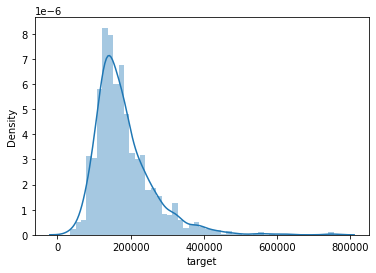

In [6]:
# check the distribution of the target

sns.distplot(housing_df.target);

# question: do you see any skew in the data?

In [7]:
housing_df.target.describe()

# some slight positive skew - this can be identified with the mode less than the median less than the mean

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: target, dtype: float64

In [8]:
print("mode of the housing_df", list(housing_df.target.mode()))

mode of the housing_df [140000.0]


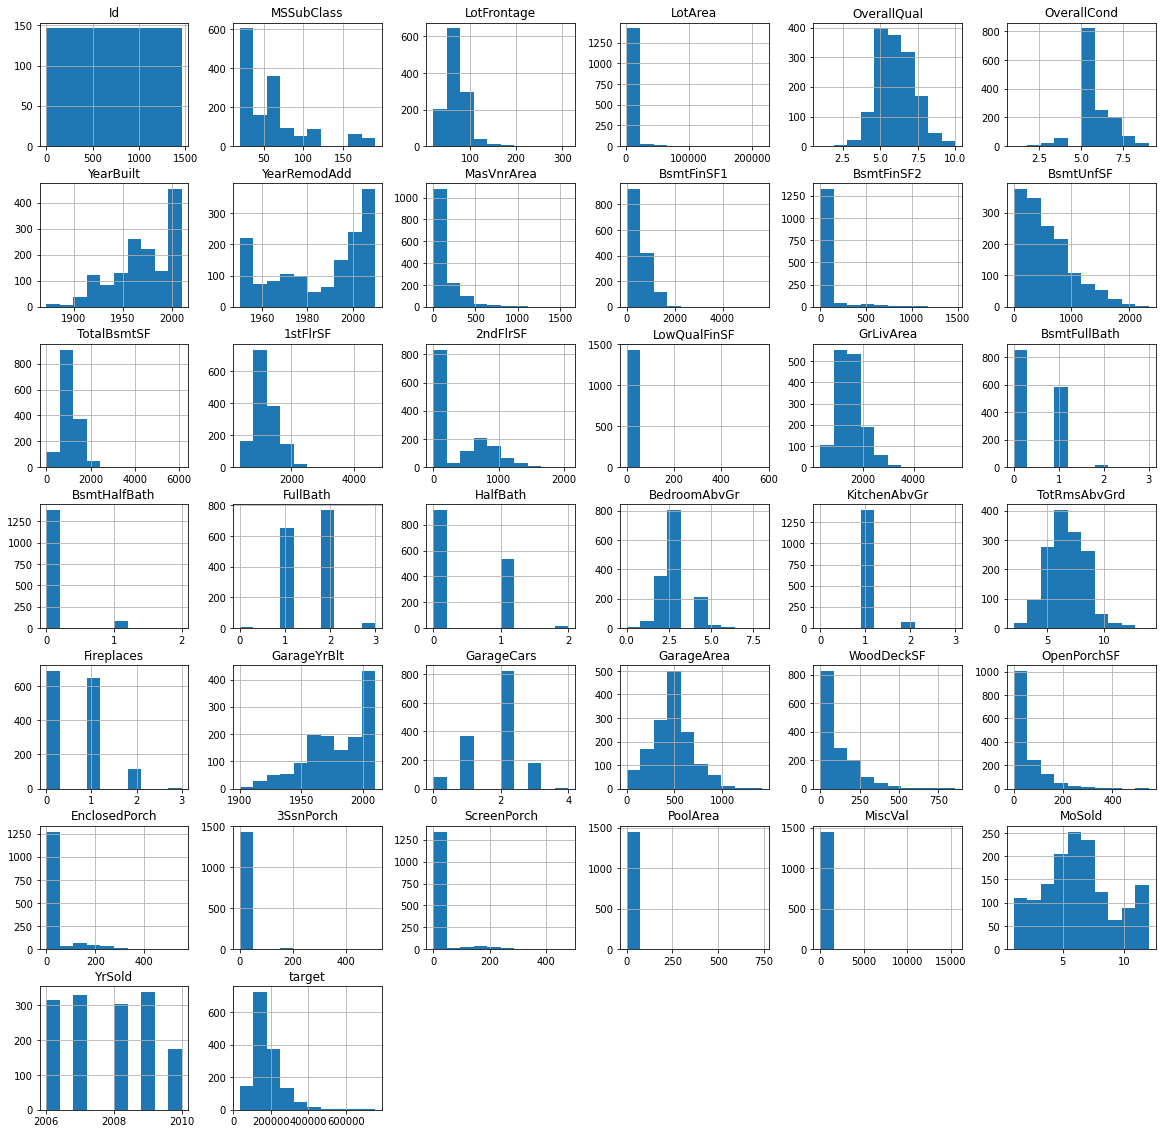

In [9]:
# what about the other numerical variables

plt.rcParams["figure.figsize"] = (20,20)

housing_df.hist();

# because of the amount of skewed data, please use tree based models only

In [10]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [11]:
# Handle missing data
# before doing any encoding, lets identify missing data

missing_value_df = identify_missing_data(housing_df) 
missing_value_df

,feature,percent_missing,data_type
0,PoolQC,99.52,object
1,MiscFeature,96.30,object
2,Alley,93.77,object
3,Fence,80.75,object
4,LotFrontage,17.74,float64
...,...,...,...
56,HeatingQC,0.00,object
57,CentralAir,0.00,object
58,MSSubClass,0.00,float64
59,2ndFlrSF,0.00,float64


In [12]:
missing_value_df = identify_missing_data(housing_df)
missing_value_df[missing_value_df.percent_missing > 0] # only look at features where percent_missing greater than 0

,feature,percent_missing,data_type
0,PoolQC,99.52,object
1,MiscFeature,96.30,object
2,Alley,93.77,object
3,Fence,80.75,object
4,LotFrontage,17.74,float64
5,GarageYrBlt,5.55,float64
6,GarageFinish,5.55,object
7,BsmtExposure,2.60,object
8,BsmtQual,2.53,object
9,BsmtCond,2.53,object


In [13]:
# drop features which have more than 40% missing values
# identify features which have more than 40% missing data

threshold = 40

cols_to_drop = list(missing_value_df[missing_value_df.percent_missing > threshold].feature)
print("number of columns to drop:", len(cols_to_drop))
print(cols_to_drop)

number of columns to drop: 4
['PoolQC', 'MiscFeature', 'Alley', 'Fence']


In [14]:
# drop the features with more than 40% missing data

housing_df.drop(cols_to_drop, axis = 1, inplace = True)

# check the variables are dropped 
housing_df.shape

(1460, 57)

In [15]:
# look for missing data

missing_value_df = identify_missing_data(housing_df)
missing_value_df[missing_value_df.percent_missing > 0] # only look at features where percent_missing greater than 0

,feature,percent_missing,data_type
0,LotFrontage,17.74,float64
1,GarageFinish,5.55,object
2,GarageYrBlt,5.55,float64
3,BsmtExposure,2.60,object
4,BsmtCond,2.53,object
5,BsmtQual,2.53,object
6,MasVnrType,0.55,object
7,MasVnrArea,0.55,float64


In [16]:
# replace all categorical (data type object) missing values with Unknown --- Option 1 

housing_df['GarageFinish'].fillna('Unknown', inplace=True)
housing_df['BsmtExposure'].fillna('Unknown', inplace=True)
housing_df['BsmtCond'].fillna('Unknown', inplace=True)
housing_df['BsmtQual'].fillna('Unknown', inplace=True)
housing_df['MasVnrType'].fillna('Unknown', inplace=True)


In [17]:
# replace all categorical (data type object) missing values with Unknown --- Option 2

missing_value_df = identify_missing_data(housing_df)
missing_value_df_reduced = missing_value_df[missing_value_df.percent_missing > 0]
categorical_cols = list(missing_value_df_reduced[missing_value_df_reduced.data_type == 'object'].feature)
print("number of categorical cols with missing data:", len(categorical_cols))
    
for c in categorical_cols:
    print("replacing missing values for:", c)
    housing_df[c].fillna('Unknown', inplace=True)

number of categorical cols with missing data: 0


In [18]:
# look for missing data

missing_value_df = identify_missing_data(housing_df)
missing_value_df[missing_value_df.percent_missing > 0] # only look at features where percent_missing greater than 0

,feature,percent_missing,data_type
0,LotFrontage,17.74,float64
1,GarageYrBlt,5.55,float64
2,MasVnrArea,0.55,float64


In [19]:
# replace all numerical (data type object) missing values with Unknown --- Option 1 

housing_df['LotFrontage'].fillna(0, inplace=True)
housing_df['GarageYrBlt'].fillna(0, inplace=True)
housing_df['MasVnrArea'].fillna(0, inplace=True)


In [20]:
# replace all numerical missing (data type int, float or bool) values with 0 --- Option 2
missing_value_df = identify_missing_data(housing_df)
missing_value_df_reduced = missing_value_df[missing_value_df.percent_missing > 0]
numerical_cols = list(missing_value_df_reduced[(missing_value_df_reduced.data_type == 'float64') |(missing_value_df_reduced.data_type == 'int64')].feature)

for n in numerical_cols:
    print("replacing missing values for:", n)
    housing_df[n].fillna(0, inplace=True)

In [21]:
# check do we have any missing data left

missing_value_df = identify_missing_data(housing_df)
missing_value_df[missing_value_df.percent_missing > 0]

,feature,percent_missing,data_type


In [22]:
# check the info - 19 variables with object data type that needs encoding

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  OverallQual    1460 non-null   float64
 13  OverallCond    1460 non-null   float64
 14  YearBuilt      1460 non-null   float64
 15  YearRemodAdd   1460 non-null   float64
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [23]:
# identify how many categorical columns of data we have i.e. variables with data type object

categorical_cols = list(housing_df.select_dtypes(['object']).columns)
print("number of categorical columns:", len(categorical_cols))

number of categorical columns: 19


In [24]:
# print the categorical cols

categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive']

In [26]:
def one_hot(df, categorical_cols):
    """
    This definition can be used to one hot encode categorical data
    
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df


In [27]:
# encode all the categorical data

categorical_columns = list(housing_df.select_dtypes(['object']).columns) # identify all the categorical columns

housing_df_w_encoding = one_hot(housing_df, categorical_columns)

# shape of the new dataframe
housing_df_w_encoding.shape

(1460, 115)

In [28]:
# check the info - do we have any categorical data left?
# we should only have floats and uint. If this is not the case, stop and go back

housing_df_w_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 115 entries, Id to PavedDrive_Y
dtypes: float64(38), uint8(77)
memory usage: 543.3 KB


In [29]:
# define the target and features

target = housing_df_w_encoding["target"]
features = housing_df_w_encoding.drop(["target"], axis = 1)

In [30]:
target.shape

(1460,)

In [31]:
features.shape

(1460, 114)

In [32]:
# split the data into train and test set
# because the dataset is imbalanced we can use stratify

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 8)


In [33]:
# print the shape of the training data

print("Training Data")
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Training Data
Shape of X_train (1022, 114)
Shape of y_train (1022,)


In [34]:
# print the shape of the test data 

print("Test Data")
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Test Data
Shape of X_test (438, 114)
Shape of y_test (438,)


In [35]:
# Build a Decision Tree Model

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [36]:
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [231500. 123000. 135000. 176000. 179900.]
first five actual values: [181000.0, 124500.0, 114500.0, 155000.0, 187500.0]


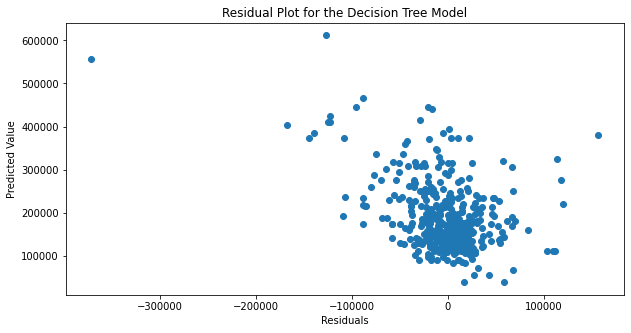

In [37]:
# new step - residual plot

plt.rcParams["figure.figsize"] = (10,5)

residuals = y_test - y_pred_dt

plt.scatter(residuals, y_pred_dt)
plt.title("Residual Plot for the Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

# we want them the points to be centred around 0

In [38]:
# the evaluation metrics for the model on the test set
r2 = r2_score(y_test, y_pred_dt)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_test, y_pred_dt)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", round(mse))

R2: 0.68
Explained Variance: 0.68
Mean Absolute Error: 25889
Mean Squared Error: 1714093306


In [43]:
# Build a Linear Regression Model without scaled data

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [44]:
print("first five predicted values:", y_pred_lr[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [124418.81174034 147029.44945257 113410.66861481 136674.14736708
 240184.92327043]
first five actual values: [181000.0, 124500.0, 114500.0, 155000.0, 187500.0]


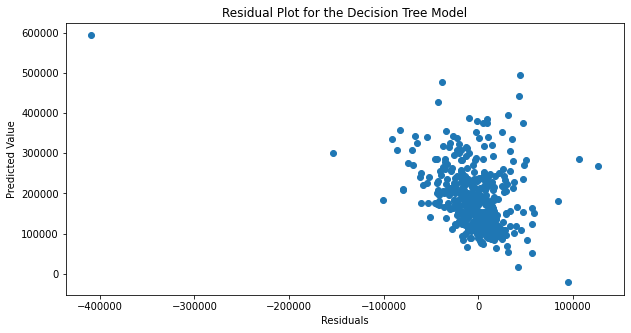

In [45]:
# residual plot

plt.rcParams["figure.figsize"] = (10,5)

residuals = y_test - y_pred_lr

plt.scatter(residuals, y_pred_lr)
plt.title("Residual Plot for the Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

# we want them the points to be centred around 0

In [46]:
# the evaluation metrics for the model on the test set
r2 = r2_score(y_test, y_pred_lr)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_test, y_pred_lr)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", round(mse))

R2: 0.78
Explained Variance: 0.78
Mean Absolute Error: 20715
Mean Squared Error: 1161589190


In [47]:
from sklearn.preprocessing import StandardScaler

# scale the data

scaler = StandardScaler()
scaler.fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)


# Build a Linear Regression Model with scaled data

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr.predict(X_test)


In [48]:
# the evaluation metrics for the model on the test set

r2 = r2_score(y_test, y_pred_lr_scaled)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_test, y_pred_lr_scaled)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_test, y_pred_lr_scaled)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_lr_scaled)
print("Mean Squared Error:", round(mse))

R2: -1.3530946036737431e+26
Explained Variance: -2.0521438249018634e+25
Mean Absolute Error: 788539403881820160
Mean Squared Error: 716612275360870207561369647893708800


In [ ]:
# Next time
# feature selection e.g. removing correlated features
# removing redundant features
